In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from transformers import pipeline
nltk.download('stopwords')

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import os
import pandas as pd

# Specify the folder path where your data files are located
folder_path = "ai_assign"  # Replace with the actual path

# Collect all Excel files from the folder
excel_files = [f for f in os.listdir(folder_path) if f.endswith(".xlsx")]

# Create an empty dictionary to store dataframes
dataframes = {}

# Loop through each file and load it into a DataFrame
for file in excel_files:
    file_path = os.path.join(folder_path, file)  # Full path to the file
    
    # Load the Excel file into a DataFrame
    df = pd.read_excel(file_path)
    
    # Print the file name and its columns
    print(f"Columns in {file}:")
    print(df.columns.tolist())  # Convert to a list and print
    print("-" * 50)  # Separator between file outputs
    
    # Store the dataframe in the dictionary
    dataframes[file] = df

# Optionally, combine all dataframes into one
combined_df = pd.concat(dataframes.values(), ignore_index=True)
print(f"Combined data shape: {combined_df.shape}")


Columns in dataset4.xlsx:
["Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a softw

In [3]:
# Drop unnecessary columns
combined_df.drop(columns=["Unnamed: 0"], inplace=True, errors="ignore")

# Rename columns for consistency
combined_df.rename(columns={"decision": "performance_(select/reject)"}, inplace=True)

# Clean the 'Transcript' column (if necessary)
combined_df["Transcript"] = combined_df["Transcript"].apply(lambda x: str(x).strip())

# Check the cleaned data
print(combined_df.head())
print(f"Cleaned data shape: {combined_df.shape}")


  Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software engineering role, bein

In [4]:
# Drop redundant or unnecessary columns
combined_df.drop(columns=["performance_(select/reject)", "ID"], inplace=True, errors="ignore")

# Drop rows with NaN values in critical columns
combined_df.dropna(subset=["Performance (select/reject)", "Reason for decision"], inplace=True)

# Optionally, handle missing values in non-critical columns (e.g., fill NaN with empty strings)
combined_df.fillna("", inplace=True)

# Calculate the number of words in each transcript if needed
combined_df["num_words_in_transcript"] = combined_df["Transcript"].apply(lambda x: len(str(x).split()))

# Check the cleaned data
print(combined_df.head())
print(f"Cleaned data shape: {combined_df.shape}")


  Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software engineering role, bein

C:\Users\HP\AppData\Local\Temp\ipykernel_11336\3507493585.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  combined_df.fillna("", inplace=True)


In [5]:
# Fill NaN values with appropriate values based on column type
for column in combined_df.columns:
    if combined_df[column].dtype == "object":  # For string or object columns
        combined_df[column].fillna("", inplace=True)  # Fill with empty string
    else:  # For numeric columns
        combined_df[column].fillna(0, inplace=True)  # Fill with 0 or another numeric value

# Check the cleaned data
print(combined_df.head())
print(f"Cleaned data shape: {combined_df.shape}")


  Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software engineering role, bein

C:\Users\HP\AppData\Local\Temp\ipykernel_11336\4178331284.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df[column].fillna("", inplace=True)  # Fill with empty string
C:\Users\HP\AppData\Local\Temp\ipykernel_11336\4178331284.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [6]:
# Fill NaN values with appropriate values based on column type
for column in combined_df.columns:
    if combined_df[column].dtype == "object":  # For string or object columns
        combined_df[column] = combined_df[column].fillna("")  # Fill with empty string
    else:  # For numeric columns
        combined_df[column] = combined_df[column].fillna(0)  # Fill with 0 or another numeric value

# Check the cleaned data
print(combined_df.head())
print(f"Cleaned data shape: {combined_df.shape}")


  Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software engineering role, bein

In [7]:
# Display basic statistical summary
import pandas as pd

# Assuming the data has been loaded into 'combined_df'
# Summary for numerical columns
numerical_summary = combined_df.describe()

# Summary for categorical columns (if any)
categorical_summary = combined_df.describe(include=['object'])

# Print the summaries
print("Numerical Summary:")
print(numerical_summary)

print("\nCategorical Summary:")
print(categorical_summary)


Numerical Summary:
       num_words_in_transcript
count               500.000000
mean                689.318000
std                 170.511634
min                 123.000000
25%                 544.000000
50%                 691.000000
75%                 829.000000
max                1192.000000

Categorical Summary:
       Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used J

In [8]:
# Check for missing values
missing_values = combined_df.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software engineer

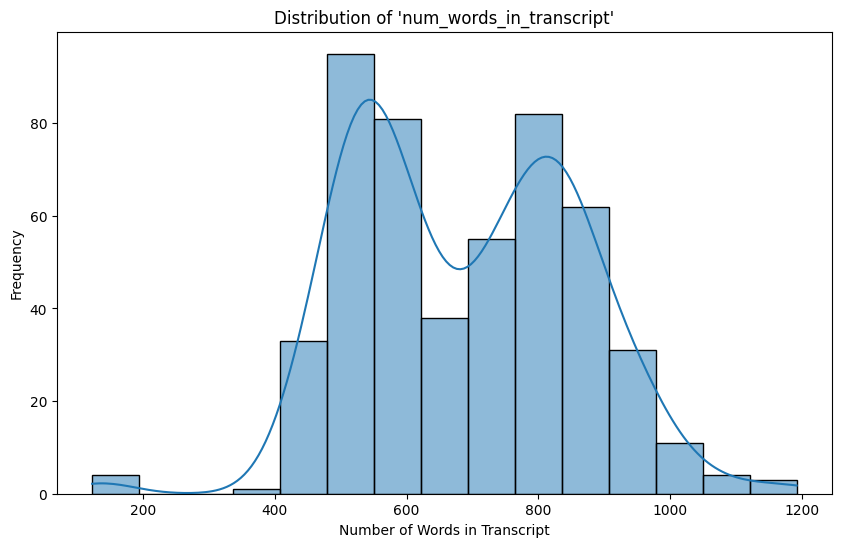

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for 'num_words_in_transcript'
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['num_words_in_transcript'], kde=True)
plt.title("Distribution of 'num_words_in_transcript'")
plt.xlabel('Number of Words in Transcript')
plt.ylabel('Frequency')
plt.show()


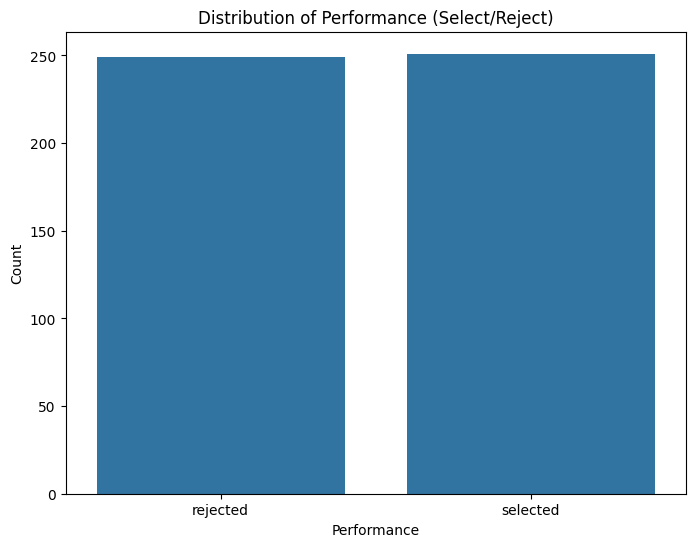

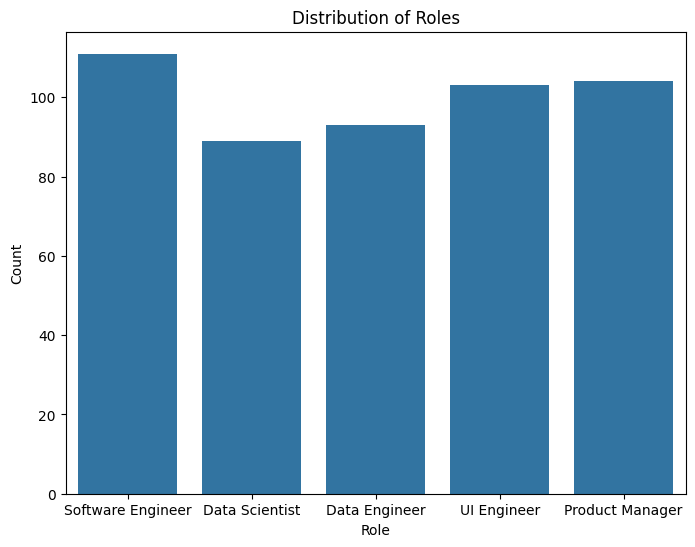

In [10]:
# Count plot for 'Performance (select/reject)'
plt.figure(figsize=(8, 6))
sns.countplot(x='Performance (select/reject)', data=combined_df)
plt.title("Distribution of Performance (Select/Reject)")
plt.xlabel('Performance')
plt.ylabel('Count')
plt.show()

# Count plot for 'Role'
plt.figure(figsize=(8, 6))
sns.countplot(x='Role', data=combined_df)
plt.title("Distribution of Roles")
plt.xlabel('Role')
plt.ylabel('Count')
plt.show()


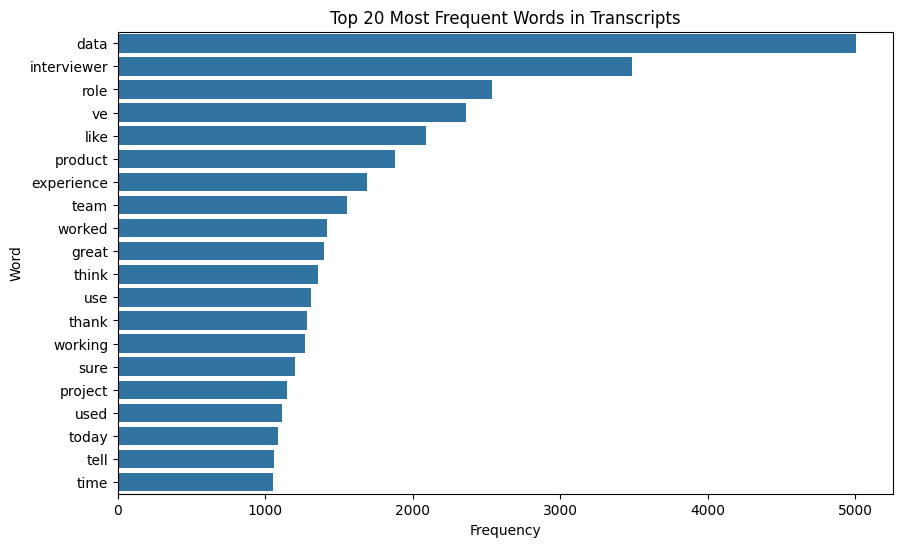

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer to remove common words (stopwords)
vectorizer = CountVectorizer(stop_words='english')

# Fit the model on the transcript data
X = vectorizer.fit_transform(combined_df['Transcript'])

# Get the word frequencies
word_freq = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

# Create a DataFrame for better visualization
word_freq_df = pd.DataFrame(list(zip(words, word_freq)), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)

# Plot the most common words
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df)
plt.title("Top 20 Most Frequent Words in Transcripts")
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


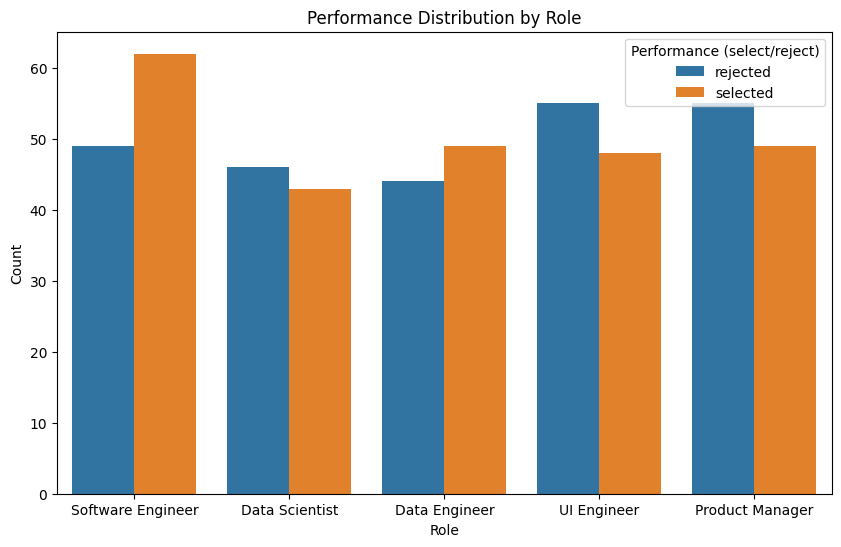

In [12]:
# Count plot for Performance by Role
plt.figure(figsize=(10, 6))
sns.countplot(x='Role', hue='Performance (select/reject)', data=combined_df)
plt.title("Performance Distribution by Role")
plt.xlabel('Role')
plt.ylabel('Count')
plt.show()


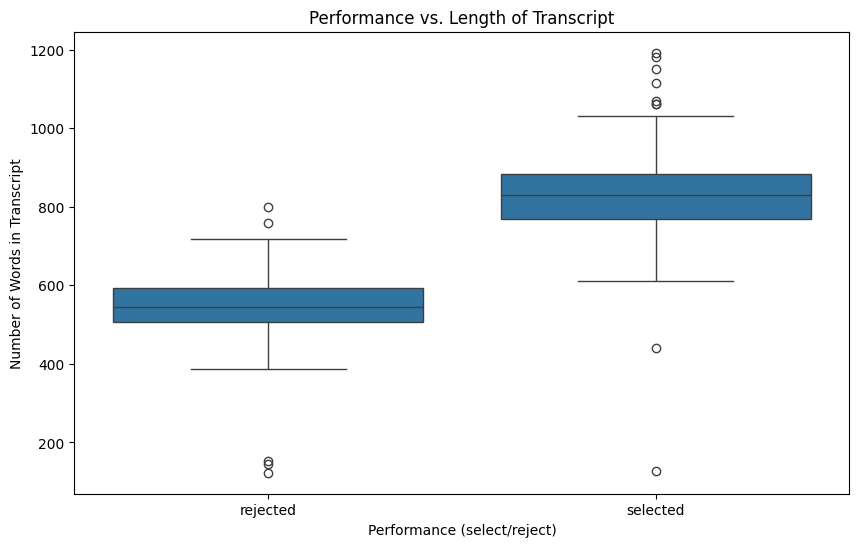

In [13]:
# Box plot to compare performance and transcript length
plt.figure(figsize=(10, 6))
sns.boxplot(x='Performance (select/reject)', y='num_words_in_transcript', data=combined_df)
plt.title("Performance vs. Length of Transcript")
plt.xlabel('Performance (select/reject)')
plt.ylabel('Number of Words in Transcript')
plt.show()


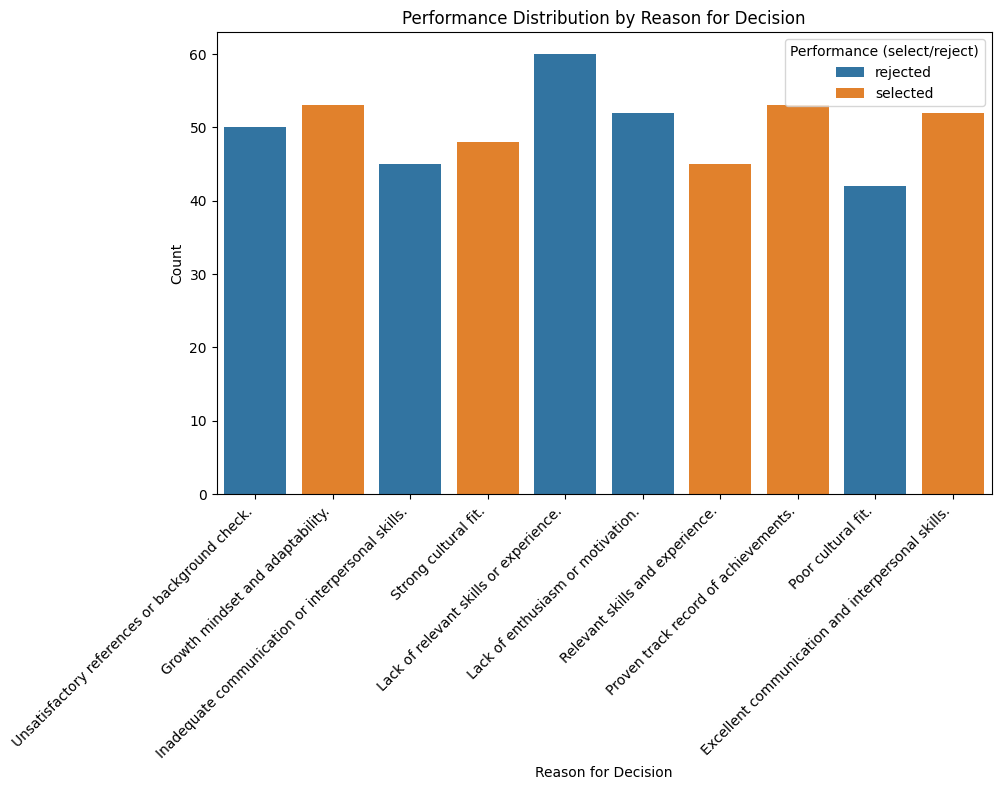

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Reason for decision', hue='Performance (select/reject)', data=combined_df)
plt.title("Performance Distribution by Reason for Decision")
plt.xlabel('Reason for Decision')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


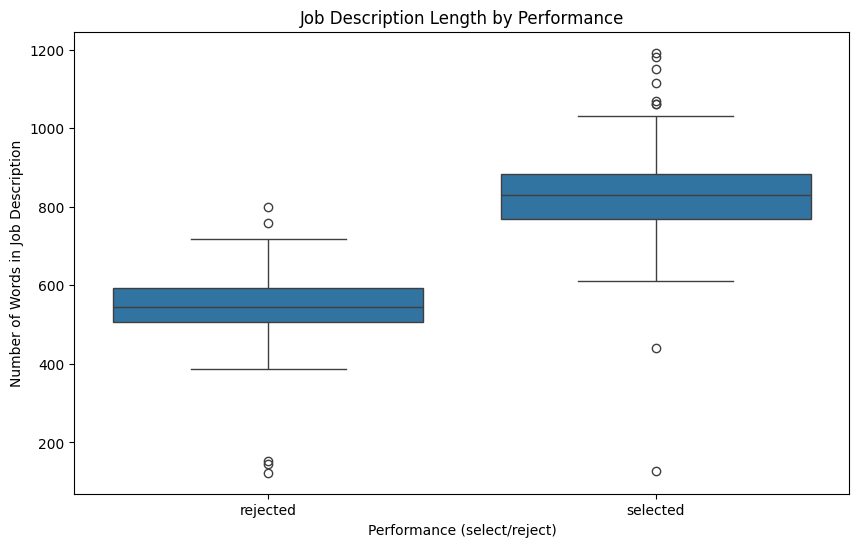

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Performance (select/reject)', y='num_words_in_transcript', data=combined_df)
plt.title("Job Description Length by Performance")
plt.xlabel('Performance (select/reject)')
plt.ylabel('Number of Words in Job Description')
plt.show()


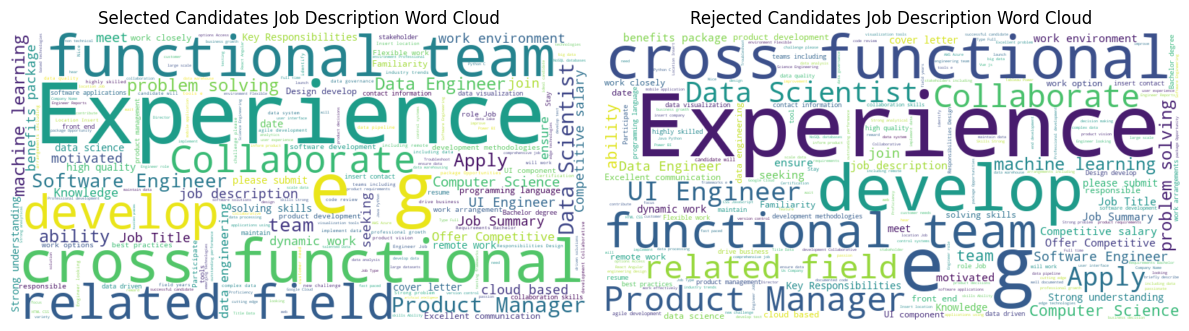

In [16]:
from wordcloud import WordCloud

# Filter data based on performance
selected_job_desc = " ".join(combined_df[combined_df['Performance (select/reject)'] == 'selected']['Job Description'])
rejected_job_desc = " ".join(combined_df[combined_df['Performance (select/reject)'] == 'rejected']['Job Description'])

# Generate word clouds
selected_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(selected_job_desc)
rejected_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(rejected_job_desc)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(selected_wordcloud, interpolation='bilinear')
plt.title("Selected Candidates Job Description Word Cloud")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rejected_wordcloud, interpolation='bilinear')
plt.title("Rejected Candidates Job Description Word Cloud")
plt.axis('off')

plt.tight_layout()
plt.show()


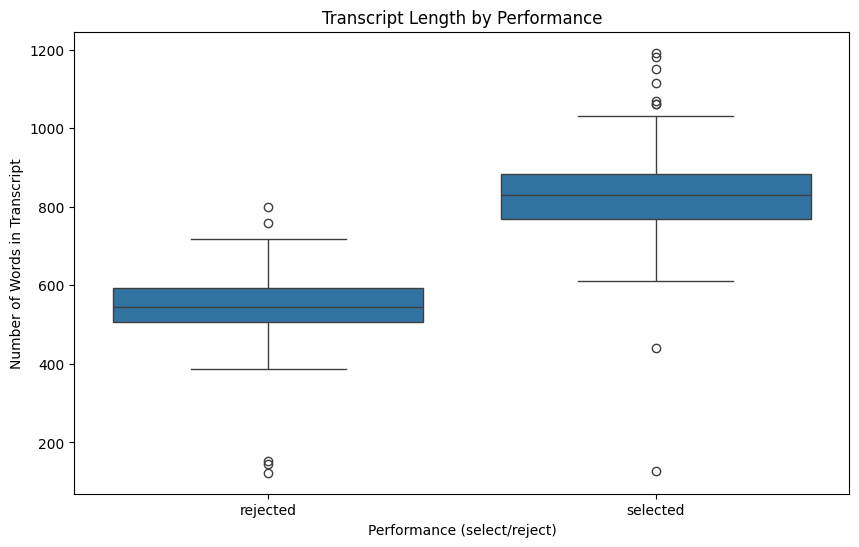

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Performance (select/reject)', y='num_words_in_transcript', data=combined_df)
plt.title("Transcript Length by Performance")
plt.xlabel('Performance (select/reject)')
plt.ylabel('Number of Words in Transcript')
plt.show()


Performance (select/reject)                                          rejected  \
Role              Reason for decision                                           
Data Engineer     Excellent communication and interpersonal skills.         0   
                  Growth mindset and adaptability.                          0   
                  Inadequate communication or interpersonal skills.        10   
                  Lack of enthusiasm or motivation.                        11   
                  Lack of relevant skills or experience.                   10   
                  Poor cultural fit.                                        9   
                  Proven track record of achievements.                      0   
                  Relevant skills and experience.                           0   
                  Strong cultural fit.                                      0   
                  Unsatisfactory references or background check.            4   
Data Scientist    Excellent 

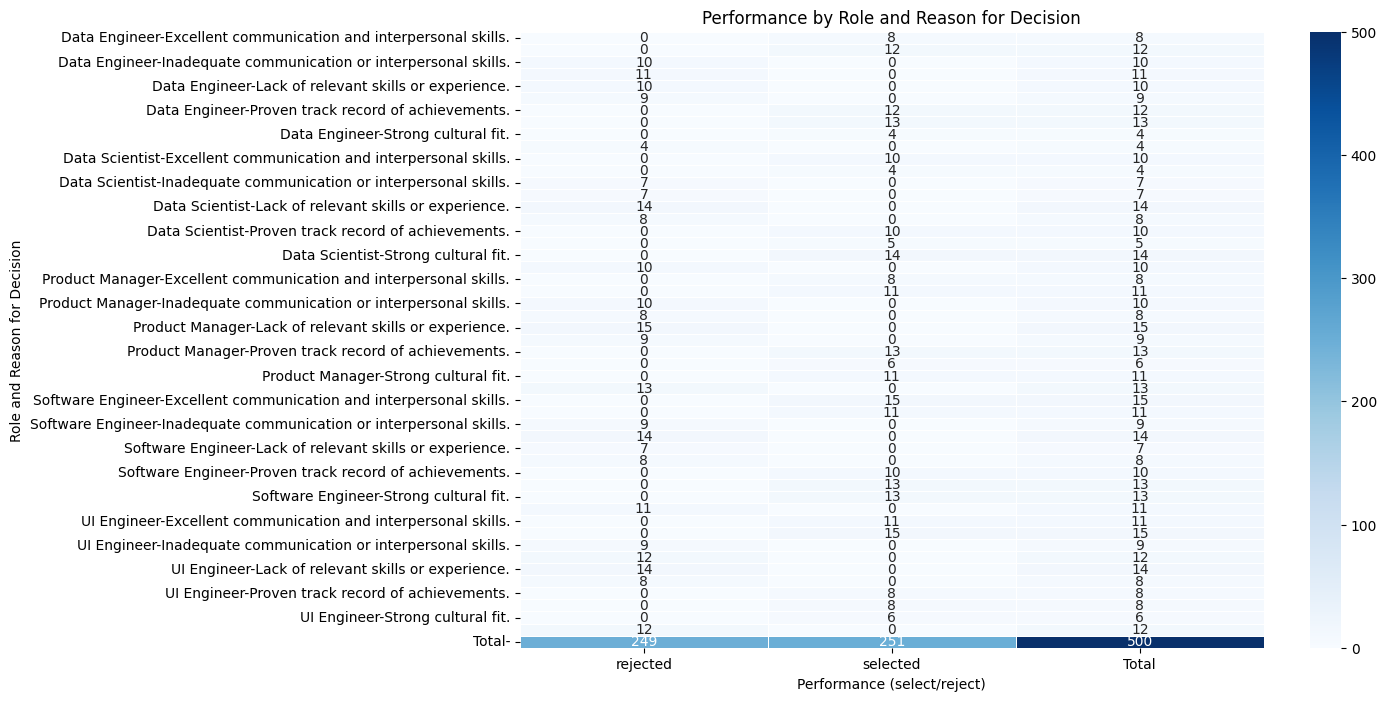

In [18]:
# Cross-tabulation of Role, Reason for Decision, and Performance
role_reason_performance = pd.crosstab(
    [combined_df['Role'], combined_df['Reason for decision']], 
    combined_df['Performance (select/reject)'],
    margins=True, margins_name="Total"
)

# Display the cross-tabulation
print(role_reason_performance)

# Visualize it with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(role_reason_performance, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title("Performance by Role and Reason for Decision")
plt.xlabel("Performance (select/reject)")
plt.ylabel("Role and Reason for Decision")
plt.show()


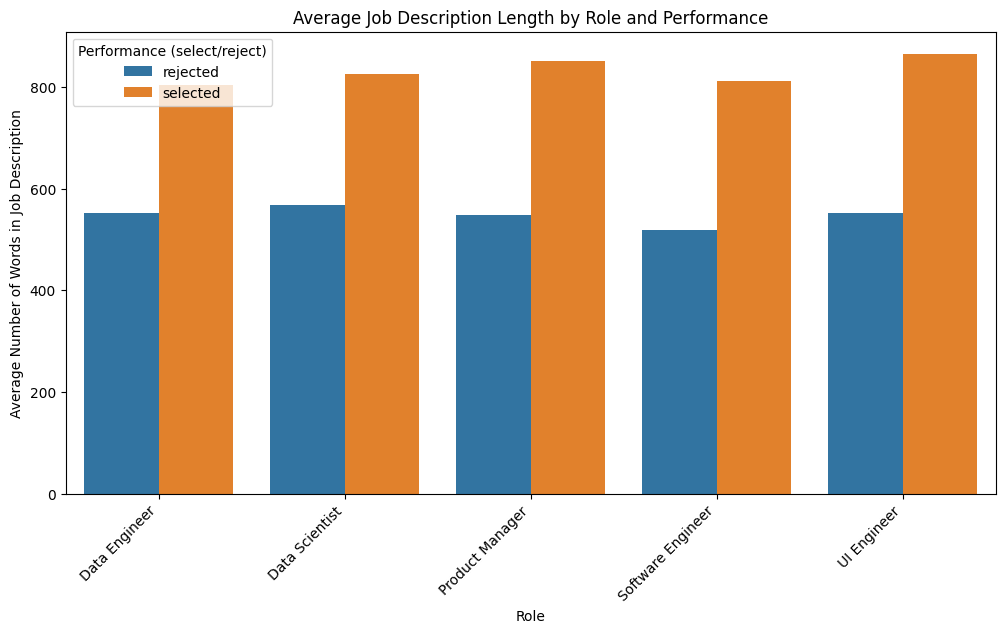

In [19]:
# Group by Role and Performance, calculate average job description length
role_desc_length = combined_df.groupby(['Role', 'Performance (select/reject)'])['num_words_in_transcript'].mean().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Role', y='num_words_in_transcript', hue='Performance (select/reject)', data=role_desc_length)
plt.title("Average Job Description Length by Role and Performance")
plt.xlabel("Role")
plt.ylabel("Average Number of Words in Job Description")
plt.xticks(rotation=45, ha='right')
plt.show()


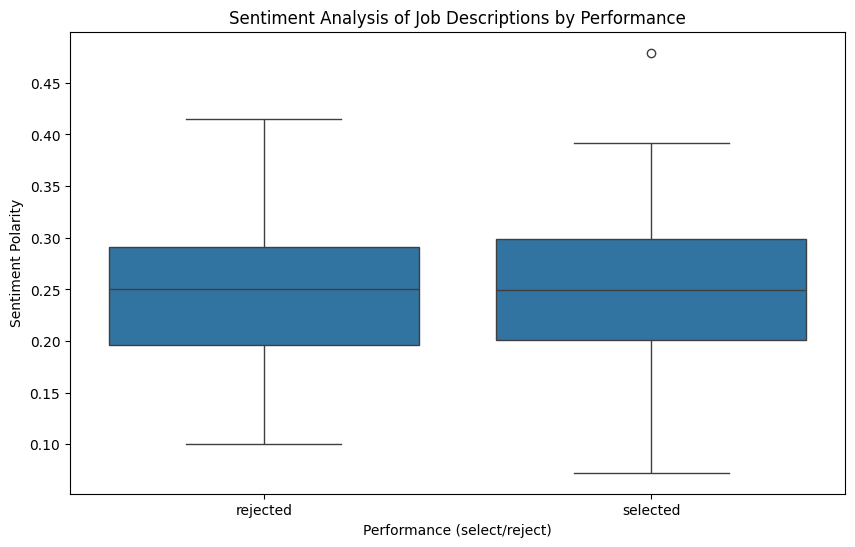

In [20]:
from textblob import TextBlob

# Sentiment analysis function
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis on Job Description text
combined_df['job_desc_sentiment'] = combined_df['Job Description'].apply(get_sentiment)

# Plot sentiment distribution by performance
plt.figure(figsize=(10, 6))
sns.boxplot(x='Performance (select/reject)', y='job_desc_sentiment', data=combined_df)
plt.title("Sentiment Analysis of Job Descriptions by Performance")
plt.xlabel("Performance (select/reject)")
plt.ylabel("Sentiment Polarity")
plt.show()


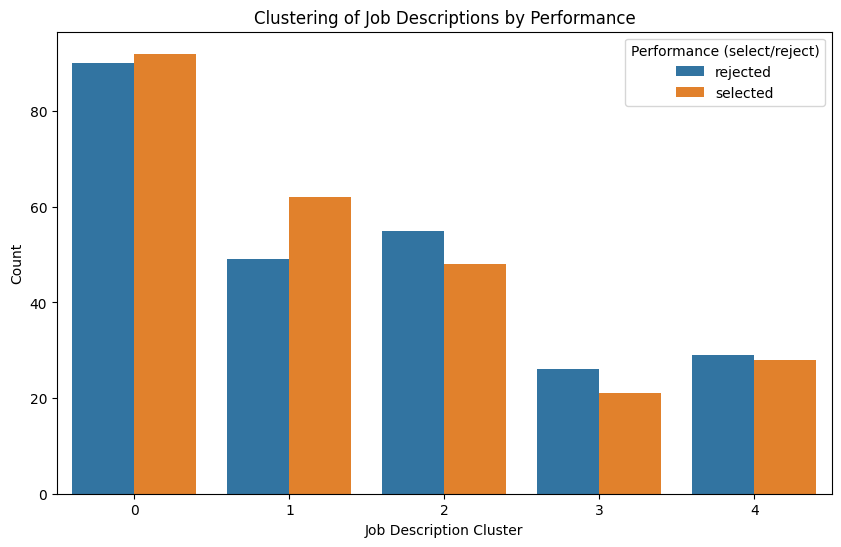

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize the Job Description text
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(combined_df['Job Description'])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
combined_df['job_desc_cluster'] = kmeans.fit_predict(X)

# Plot clusters distribution by performance
plt.figure(figsize=(10, 6))
sns.countplot(x='job_desc_cluster', hue='Performance (select/reject)', data=combined_df)
plt.title("Clustering of Job Descriptions by Performance")
plt.xlabel("Job Description Cluster")
plt.ylabel("Count")
plt.show()


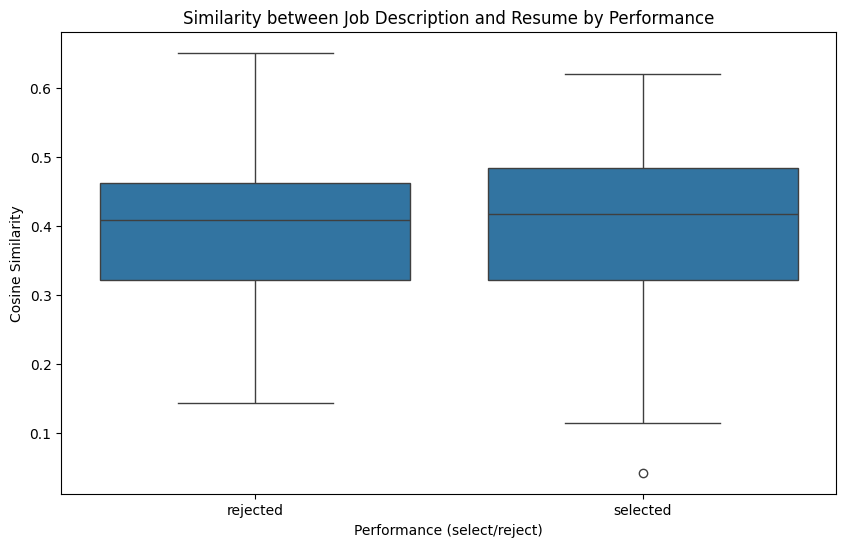

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

# Vectorize both Job Description and Resume text
job_desc_vector = vectorizer.transform(combined_df['Job Description'])
resume_vector = vectorizer.transform(combined_df['Resume'])

# Compute cosine similarity between Job Description and Resume
combined_df['resume_job_desc_similarity'] = cosine_similarity(job_desc_vector, resume_vector).diagonal()

# Visualize similarity by performance
plt.figure(figsize=(10, 6))
sns.boxplot(x='Performance (select/reject)', y='resume_job_desc_similarity', data=combined_df)
plt.title("Similarity between Job Description and Resume by Performance")
plt.xlabel("Performance (select/reject)")
plt.ylabel("Cosine Similarity")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11336\3244788215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_features['Performance (select/reject)'] = combined_df['Performance (select/reject)'].map({'select': 1, 'reject': 0})


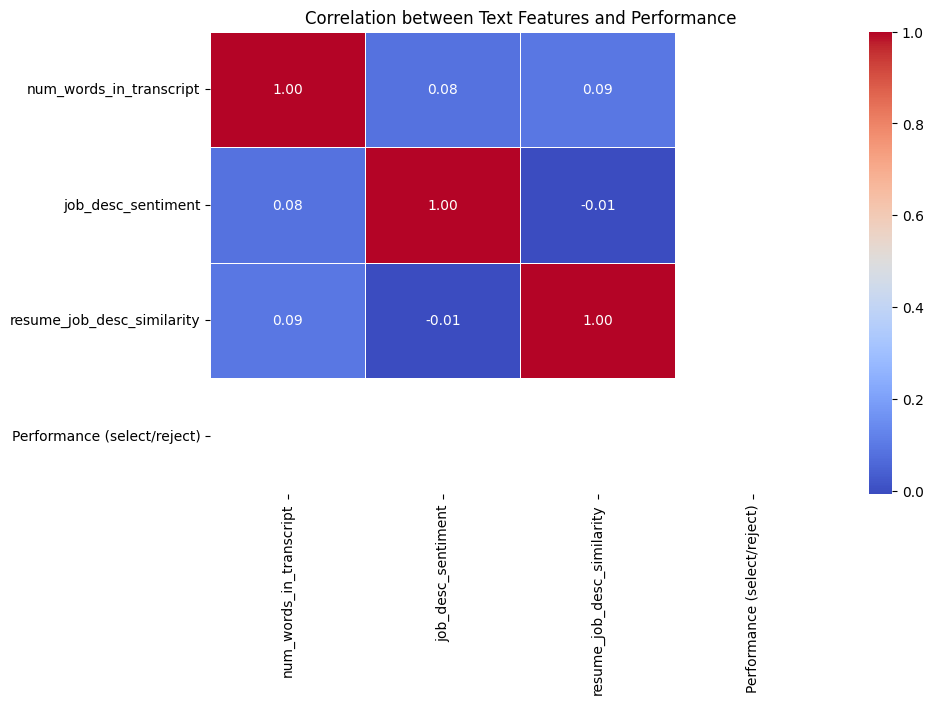

In [23]:
# Correlation matrix of text features
text_features = combined_df[['num_words_in_transcript', 'job_desc_sentiment', 'resume_job_desc_similarity']]
text_features['Performance (select/reject)'] = combined_df['Performance (select/reject)'].map({'select': 1, 'reject': 0})

# Calculate correlation
corr_matrix = text_features.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation between Text Features and Performance")
plt.show()


In [24]:
!pip install textblob


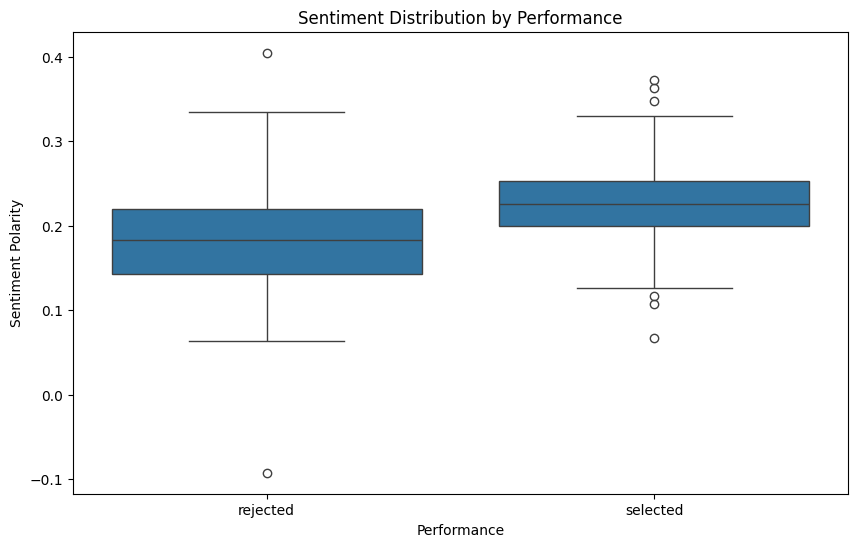

Performance (select/reject)
rejected    0.181888
selected    0.225927
Name: Sentiment, dtype: float64


In [25]:
from textblob import TextBlob

# Define a function to calculate the sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the interview transcripts
combined_df['Sentiment'] = combined_df['Transcript'].apply(get_sentiment)

# Visualize sentiment for selected vs rejected
plt.figure(figsize=(10, 6))
sns.boxplot(x='Performance (select/reject)', y='Sentiment', data=combined_df)
plt.title("Sentiment Distribution by Performance")
plt.xlabel('Performance')
plt.ylabel('Sentiment Polarity')
plt.show()

# Calculate average sentiment by performance
avg_sentiment = combined_df.groupby('Performance (select/reject)')['Sentiment'].mean()
print(avg_sentiment)


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use 'english' for built-in stopwords
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = tfidf_vectorizer.fit_transform(selected_transcripts)

# Convert the result to a DataFrame for better viewing
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_sum = tfidf_df.sum(axis=0).sort_values(ascending=False)

print(tfidf_sum)

# Plot the most important words for selected candidates
plt.figure(figsize=(12, 6))
tfidf_sum.head(10).plot(kind='bar', color='lightcoral')
plt.title("Top 10 Most Important Words for Selected Candidates (TF-IDF)")
plt.xlabel("Words")
plt.ylabel("TF-IDF Score")
plt.show()


NameError: name 'selected_transcripts' is not defined

C:\Users\HP\AppData\Local\Temp\ipykernel_11336\2288602614.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_df, x='Performance (select/reject)', palette='viridis')


<Figure size 1000x600 with 0 Axes>

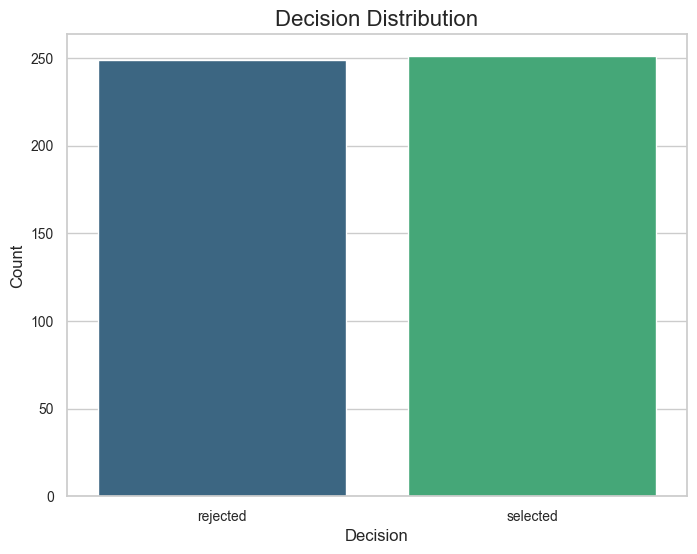

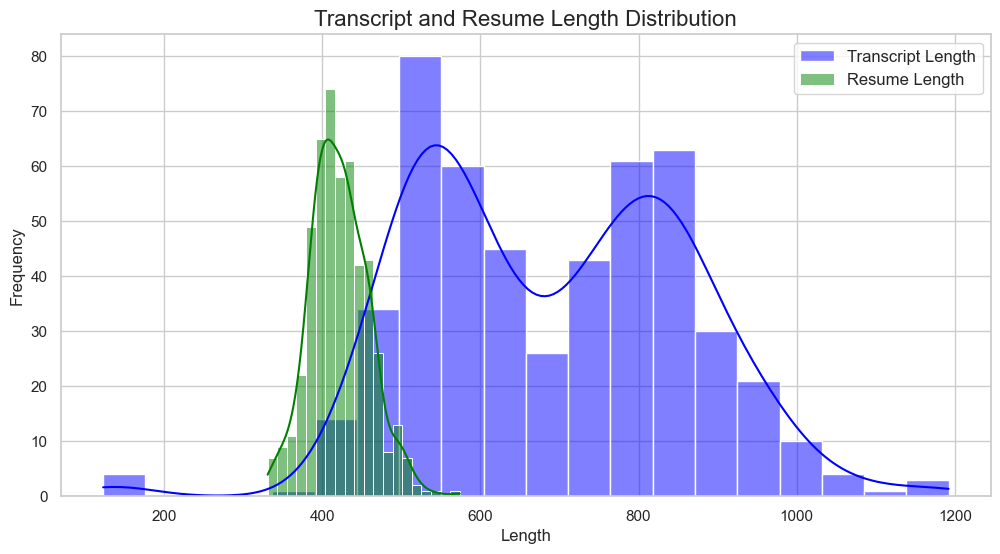

C:\Users\HP\AppData\Local\Temp\ipykernel_11336\2288602614.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reason_counts.index, y=reason_counts.values, palette='coolwarm')


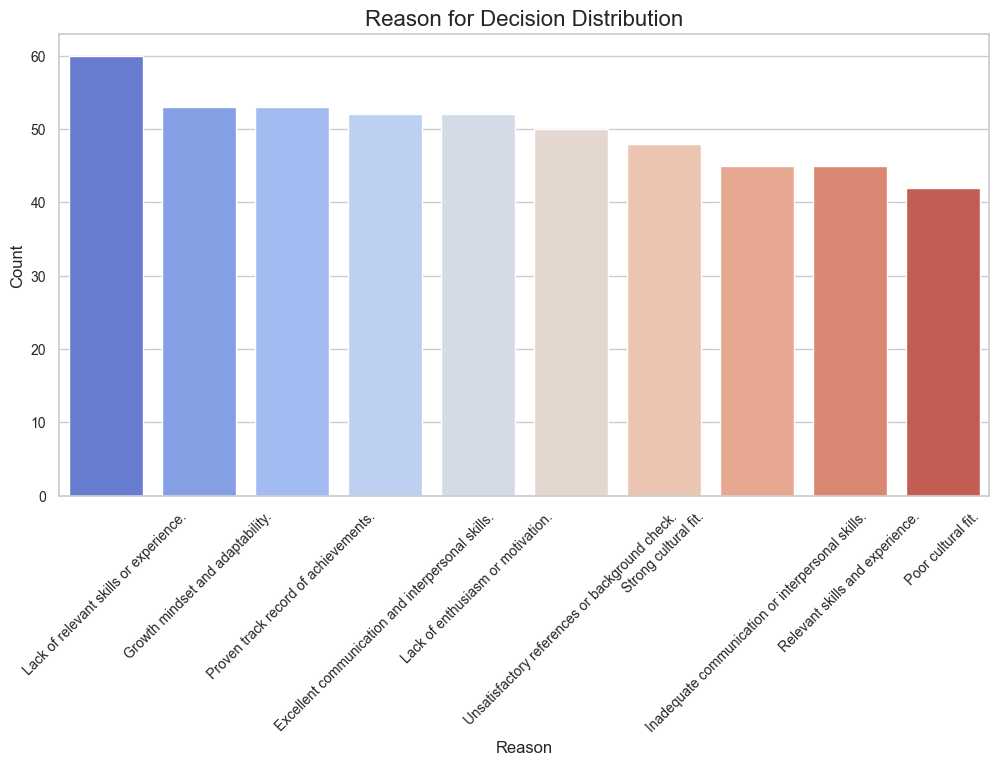

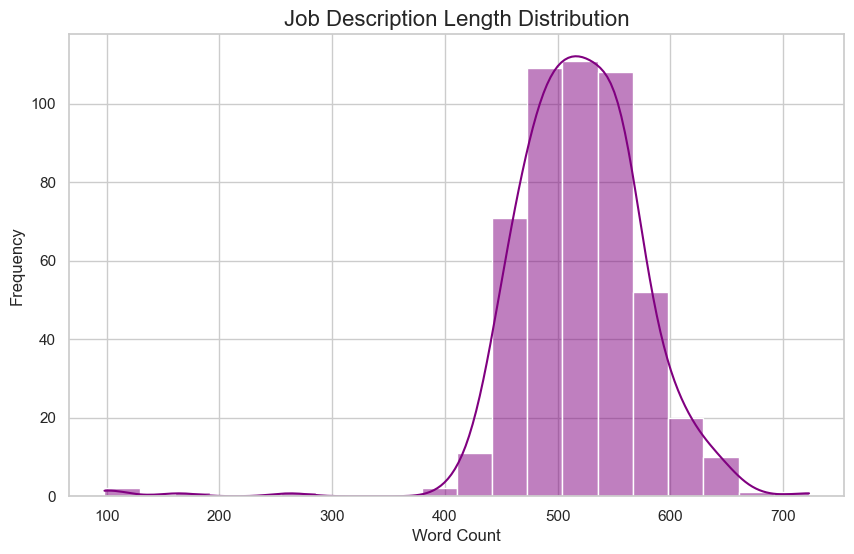

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the distribution of 'Performance (select/reject)' decision
if 'Performance (select/reject)' in combined_df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=combined_df, x='Performance (select/reject)', palette='viridis')
    plt.title('Decision Distribution', fontsize=16)
    plt.xlabel('Decision', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Plot a word count distribution for 'Transcript' and 'Resume'
if 'Transcript' in combined_df.columns and 'Resume' in combined_df.columns:
    combined_df['Transcript Length'] = combined_df['Transcript'].str.split().str.len()
    combined_df['Resume Length'] = combined_df['Resume'].str.split().str.len()

    plt.figure(figsize=(12, 6))
    sns.histplot(combined_df['Transcript Length'], kde=True, color='blue', label='Transcript Length', bins=20)
    sns.histplot(combined_df['Resume Length'], kde=True, color='green', label='Resume Length', bins=20)
    plt.title('Transcript and Resume Length Distribution', fontsize=16)
    plt.xlabel('Length', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(fontsize=12)
    plt.show()

# Plot a bar chart for 'Reason for decision'
if 'Reason for decision' in combined_df.columns:
    plt.figure(figsize=(12, 6))
    reason_counts = combined_df['Reason for decision'].value_counts()
    sns.barplot(x=reason_counts.index, y=reason_counts.values, palette='coolwarm')
    plt.title('Reason for Decision Distribution', fontsize=16)
    plt.xlabel('Reason', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Plot the distribution of 'Job Description' word counts
if 'Job Description' in combined_df.columns:
    combined_df['Job Description Length'] = combined_df['Job Description'].str.split().str.len()
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_df['Job Description Length'], kde=True, color='purple', bins=20)
    plt.title('Job Description Length Distribution', fontsize=16)
    plt.xlabel('Word Count', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()



In [28]:
combined_df.to_csv('your_data.csv', index=False)


In [29]:
import pandas as pd

# Load the dataset
df = pd.read_csv('your_data.csv')

# Inspect the first few rows
print(df.head())


  Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software engineering role, bein

In [30]:
# Save the combined dataframe to a CSV file
combined_df.to_csv('combined_dataset.csv', index=False)
print("Combined dataframe saved to 'combined_dataset.csv'.")

Combined dataframe saved to 'combined_dataset.csv'.


In [31]:
combined_df.shape

(500, 16)

In [32]:
combined_df.head()

,"Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software engineering role, being able to write high-quality, efficient code is crucial. Can you give me an example of a particularly challenging coding problem you've solved in the past? How did you approach it?\n\n**Alice Smith:** Well, there was this one time...I think it was a homework assignment or something. We had to implement a sorting algorithm, and I chose to use...um...merge sort, I think? I don't really remember the details, but it was a while ago.\n\n**Interviewer:** Merge sort is a good choice. But can you tell me more about the specifics of how you implemented it? For example, how did you handle edge cases or optimize the algorithm for performance?\n\n**Alice Smith:** (pauses) Honestly, I don't really remember. I mean, I wrote the code, but I don't recall the details of how I handled edge cases or anything like that.\n\n**Interviewer:** I understand that it's been a while since you wrote the code, but as a software engineer, being able to recall and explain the details of your work is important. Can you tell me about your experience with any specific software development methodologies, such as Agile or Scrum?\n\n**Alice Smith:** (nervously) Uh, I've heard of those...I think? We used something like that on a project once, but I don't really remember the specifics. I'm sure it's not that important.\n\n**Interviewer:** (pausing, considering whether to continue the line of questioning) Okay, let's move on to some technical questions. Can you explain the difference between a stack and a queue data structure?\n\n**Alice Smith:** (hesitates) Um...I think a stack is like...a pile of plates? And a queue is like...a line of people?\n\n**Interviewer:** (surprised) That's not quite correct. A stack is a last-in, first-out data structure, whereas a queue is a first-in, first-out data structure. Let's move on to the next question.\n\n**Interviewer:** (quickly wrapping up the interview) Well, Alice, thank you for coming in today. Do you have any questions for me?\n\n**Alice Smith:** (relieved) Yeah, actually. What's the company culture like here?\n\n**Interviewer:** (smiling politely) That's a great question. We're a collaborative and innovative team. We're always looking for ways to improve our processes and technology. We'll be in touch soon to let you know about next steps.\n\n**Interviewer:** (to themselves) Not sure if this candidate is a good fit for the role...",Name,Role,Transcript,Resume,Performance (select/reject),Reason for decision,Job Description,num_words_in_transcript,job_desc_sentiment,job_desc_cluster,resume_job_desc_similarity,Sentiment,Transcript Length,Resume Length,Job Description Length
0,uppaup1,Alice Smith,Software Engineer,Here's a simulated interview for a Software En...,Here's a sample resume for Alice Smith:\n\n**A...,rejected,Unsatisfactory references or background check.,Here is a comprehensive job description for a ...,545,0.276204,1,0.200512,0.233818,545,390,562
1,uppaup2,Hank Brown,Software Engineer,Here's a simulated interview for a Software En

In [33]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [34]:
# Function to clean text columns
def clean_text_column(column):
    """
    Cleans a text column by:
    1. Removing all non-alphabetic characters.
    2. Removing extra spaces.
    3. Converting text to lowercase.
    """
    if column.dtype == 'object':  # Only apply to text columns
        return column.str.replace(r"[^a-zA-Z\s]", "", regex=True).str.strip().str.lower()
    return column

# Clean specific text columns
columns_to_clean = ['Transcript', 'Resume', 'Job Description', 'Reason for decision']
for col in columns_to_clean:
    if col in combined_df.columns:
        combined_df[col] = clean_text_column(combined_df[col])

# Display cleaned data for verification
print("Cleaned Data Sample:")
combined_df.head()

Cleaned Data Sample:


,"Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software engineering role, being able to write high-quality, efficient code is crucial. Can you give me an example of a particularly challenging coding problem you've solved in the past? How did you approach it?\n\n**Alice Smith:** Well, there was this one time...I think it was a homework assignment or something. We had to implement a sorting algorithm, and I chose to use...um...merge sort, I think? I don't really remember the details, but it was a while ago.\n\n**Interviewer:** Merge sort is a good choice. But can you tell me more about the specifics of how you implemented it? For example, how did you handle edge cases or optimize the algorithm for performance?\n\n**Alice Smith:** (pauses) Honestly, I don't really remember. I mean, I wrote the code, but I don't recall the details of how I handled edge cases or anything like that.\n\n**Interviewer:** I understand that it's been a while since you wrote the code, but as a software engineer, being able to recall and explain the details of your work is important. Can you tell me about your experience with any specific software development methodologies, such as Agile or Scrum?\n\n**Alice Smith:** (nervously) Uh, I've heard of those...I think? We used something like that on a project once, but I don't really remember the specifics. I'm sure it's not that important.\n\n**Interviewer:** (pausing, considering whether to continue the line of questioning) Okay, let's move on to some technical questions. Can you explain the difference between a stack and a queue data structure?\n\n**Alice Smith:** (hesitates) Um...I think a stack is like...a pile of plates? And a queue is like...a line of people?\n\n**Interviewer:** (surprised) That's not quite correct. A stack is a last-in, first-out data structure, whereas a queue is a first-in, first-out data structure. Let's move on to the next question.\n\n**Interviewer:** (quickly wrapping up the interview) Well, Alice, thank you for coming in today. Do you have any questions for me?\n\n**Alice Smith:** (relieved) Yeah, actually. What's the company culture like here?\n\n**Interviewer:** (smiling politely) That's a great question. We're a collaborative and innovative team. We're always looking for ways to improve our processes and technology. We'll be in touch soon to let you know about next steps.\n\n**Interviewer:** (to themselves) Not sure if this candidate is a good fit for the role...",Name,Role,Transcript,Resume,Performance (select/reject),Reason for decision,Job Description,num_words_in_transcript,job_desc_sentiment,job_desc_cluster,resume_job_desc_similarity,Sentiment,Transcript Length,Resume Length,Job Description Length
0,uppaup1,Alice Smith,Software Engineer,heres a simulated interview for a software eng...,heres a sample resume for alice smith\n\nalice...,rejected,unsatisfactory references or background check,here is a comprehensive job description for a ...,545,0.276204,1,0.200512,0.233818,545,390,562
1,uppaup2,Hank Brown,Software Engineer,heres a simulated interview for a software eng.

In [36]:
def process_decision(text):
    if text in ['select','selected']:
        return 'select'
    else :
        return 'reject'

In [37]:
combined_df['Role'].unique()

array(['Software Engineer', 'Data Scientist', 'Data Engineer',
       'UI Engineer', 'Product Manager'], dtype=object)

In [39]:
# Generate summary insights
insights = {}

# Total Candidates
insights['Total Candidates'] = len(combined_df)

# Selected and Rejected Candidates
if 'decision' in combined_df.columns:
    decision_counts = combined_df['decision'].str.strip().value_counts()
    insights['Select Candidates'] = decision_counts.get('select', 0)
    insights['Reject Candidates'] = decision_counts.get('reject', 0)
    insights['Selected Candidates'] = decision_counts.get('selected', 0)
    insights['Rejected Candidates'] = decision_counts.get('rejected', 0)
else:
    insights['Selected Candidates'] = "Column 'Decision' not found"
    insights['Rejected Candidates'] = "Column 'Decision' not found"

# Most Common Reason for Decision
if 'Reason for decision' in combined_df.columns:
    insights['Most Common Reason for Decision'] = combined_df['Reason for decision'].mode()[0]
else:
    insights['Most Common Reason for Decision'] = "Column 'Reason for decision' not found"

# Print insights
print("Insights:")
for key, value in insights.items():
    print(f"{key}: {value}")

Insights:
Total Candidates: 500
Selected Candidates: Column 'Decision' not found
Rejected Candidates: Column 'Decision' not found
Most Common Reason for Decision: lack of relevant skills or experience


In [40]:
# Check for null values
print("Null values in combined dataset:")
print(combined_df.isnull().sum())

Null values in combined dataset:
Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a 

In [41]:
# Basic statistics for numeric columns
print("Basic statistics for numeric columns:")
combined_df.describe()

Basic statistics for numeric columns:


,num_words_in_transcript,job_desc_sentiment,job_desc_cluster,resume_job_desc_similarity,Sentiment,Transcript Length,Resume Length,Job Description Length
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,689.318000,0.248286,1.372000,0.397796,0.203995,689.318000,421.834000,518.846000
std,170.511634,0.066800,1.355467,0.107873,0.055889,170.511634,36.979961,58.876133
min,123.000000,0.072479,0.000000,0.042313,-0.092115,123.000000,331.000000,98.000000
25%,544.000000,0.199520,0.000000,0.321938,0.170569,544.000000,396.000000,485.750000
50%,691.000000,0.249567,1.000000,0.412071,0.206307,691.000000,419.500000,519.000000
75%,829.000000,0.292702,2.000000,0.477144,0.239067,829.000000,447.000000,554.000000
max,1192.000000,0.479167,4.000000,0.651410,0.404808,1192.000000,574.000000,723.000000


In [42]:
# Add length columns for Transcript, Resume, and Job Description
combined_df['Transcript_length'] = combined_df['Transcript'].apply(lambda x: len(str(x)))
combined_df['Resume_length'] = combined_df['Resume'].apply(lambda x: len(str(x)))
combined_df['Job_Description_length'] = combined_df['Job Description'].apply(lambda x: len(str(x)))

In [43]:
print(combined_df.columns.tolist())

["Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software engineering role, bein

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Ensure the necessary columns exist in the dataset
required_columns = ['Transcript', 'Resume', 'Job Description']
for col in required_columns:
    if col not in combined_df.columns:
        raise ValueError(f"Missing required column: {col}")

# Fill missing values with empty strings to avoid errors
for col in required_columns:
    combined_df[col] = combined_df[col].fillna("")

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Define a function to calculate similarity score
def calculate_similarity(text1, text2):
    tfidf_matrix = tfidf_vectorizer.fit_transform([text1, text2])
    similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
    return similarity
# Calculate scores
combined_df['Transcript_Resume_Score'] = combined_df.apply(
    lambda row: calculate_similarity(row['Transcript'], row['Resume']), axis=1
)
combined_df['Transcript_JobDescription_Score'] = combined_df.apply(
    lambda row: calculate_similarity(row['Transcript'], row['Job Description']), axis=1
)
combined_df['Resume_JobDescription_Score'] = combined_df.apply(
    lambda row: calculate_similarity(row['Resume'], row['Job Description']), axis=1
)

# Calculate the final score as an average of the pairwise scores
combined_df['Final_Match_Score'] = combined_df[
    ['Transcript_Resume_Score', 'Transcript_JobDescription_Score', 'Resume_JobDescription_Score']
].mean(axis=1)

# # Save the dataframe with the scores to a file
# combined_df.to_csv('combined_dataset_with_scores.csv', index=False)
# print("Combined dataset with match scores saved to 'combined_dataset_with_scores.csv'.")

# Display a sample of the data with the calculated scores
combined_df[['Transcript', 'Resume', 'Job Description', 'Transcript_Resume_Score',
                   'Transcript_JobDescription_Score', 'Resume_JobDescription_Score', 'Final_Match_Score']].head()
    

,Transcript,Resume,Job Description,Transcript_Resume_Score,Transcript_JobDescription_Score,Resume_JobDescription_Score,Final_Match_Score
0,heres a simulated interview for a software eng...,heres a sample resume for alice smith\n\nalice...,here is a comprehensive job description for a ...,0.128843,0.159541,0.267942,0.185442
1,heres a simulated interview for a software eng...,heres a resume for hank brown a selected candi...,here is a job description for a software engin...,0.268331,0.190271,0.268425,0.242342
2,heres a simulated interview for a data scienti...,heres a sample resume for bob jones who applie...,here is a comprehensive job description for a ...,0.311734,0.285505,0.466292,0.354511
3,heres a simulated interview for a software eng...,heres a sample resume for bob miller a softwar...,here is a sample job description for a softwar...,0.226898,0.259491,0.326965,0.271118
4,heres a simulated interview for a data enginee...,heres a sample resume for ivy jones\n\nivy jon...,here is a sample job description for a data en...,0.361991,0.420489,0.588236,0.456905


C:\Users\HP\AppData\Local\Temp\ipykernel_11336\3925178132.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reason_counts.values, y=reason_counts.index, palette='coolwarm')


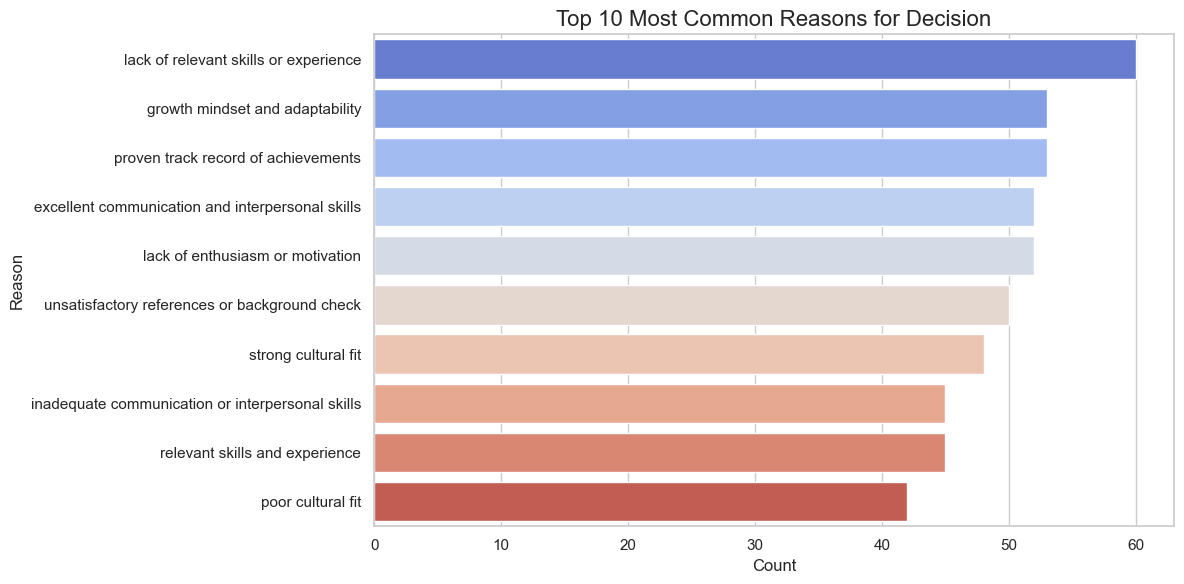

In [47]:
# Configure visualizations
sns.set(style="whitegrid")

# Plot the most common 'Reason for Decision' if the column exists
if 'Reason for decision' in combined_df.columns:
    plt.figure(figsize=(12, 6))
    
    # Get the top 10 most common reasons
    reason_counts = combined_df['Reason for decision'].value_counts().head(10)
    
    # Create the bar plot
    sns.barplot(x=reason_counts.values, y=reason_counts.index, palette='coolwarm')
    
    # Add plot title and axis labels
    plt.title('Top 10 Most Common Reasons for Decision', fontsize=16)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Reason', fontsize=12)
    plt.tight_layout()
    plt.show()

In [48]:

# Check for missing values or completely empty rows
print("Number of missing values in Transcript:", combined_df['Transcript'].isnull().sum())
print("Number of missing values in Resume:", combined_df['Resume'].isnull().sum())
print("Number of missing values in Transcript:", combined_df['Reason for decision'].isnull().sum())
print("Number of missing values in Resume:", combined_df['Job Description'].isnull().sum())

Number of missing values in Transcript: 0
Number of missing values in Resume: 0
Number of missing values in Transcript: 0
Number of missing values in Resume: 0


In [49]:
# Apply cleaning to all object-type columns in the dataset
combined_df = combined_df.apply(lambda col: clean_text_column(col) if col.dtype == 'object' else col)

In [50]:
# Check for remaining unwanted characters
for col in columns_to_clean:
    if col in combined_df.columns:
        print(f"Sample cleaned data from column '{col}':")
        combined_df[col].head()

Sample cleaned data from column 'Transcript':
Sample cleaned data from column 'Resume':
Sample cleaned data from column 'Job Description':
Sample cleaned data from column 'Reason for decision':


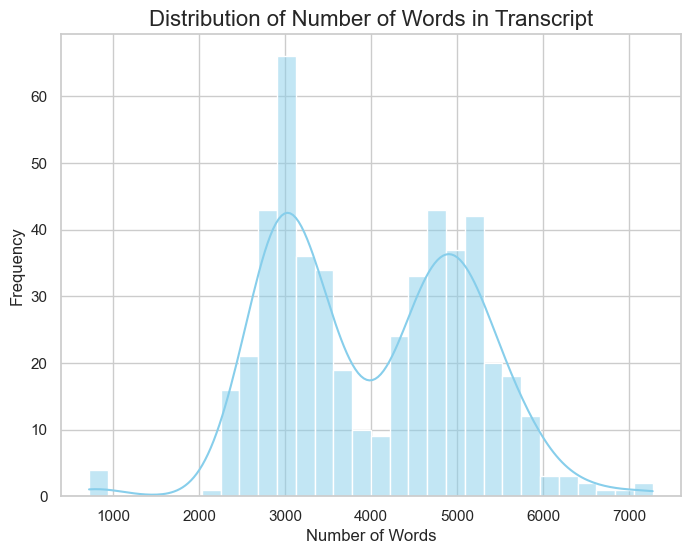

In [51]:
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['Transcript_length'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Number of Words in Transcript", fontsize=16)
plt.xlabel("Number of Words", fontsize=12)


plt.ylabel("Frequency", fontsize=12)
plt.show()

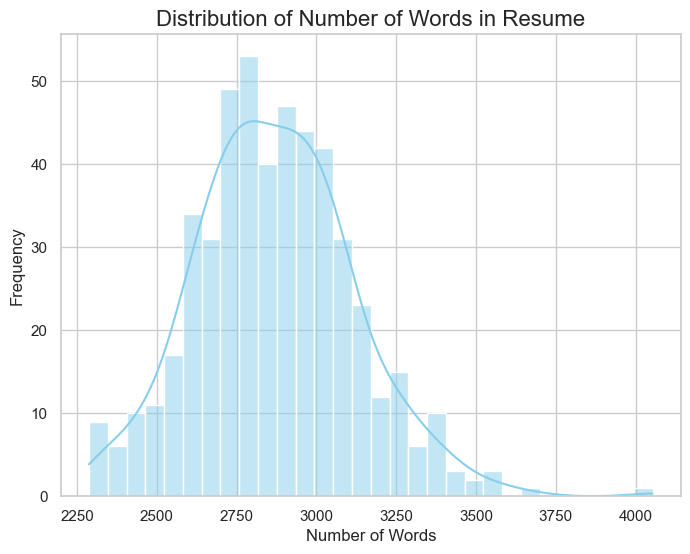

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of Resume length (number of words in resume)
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['Resume_length'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Number of Words in Resume", fontsize=16)
plt.xlabel("Number of Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
reason_counts = combined_df['Reason for decision'].value_counts().head(10)
sns.barplot(x=reason_counts.index, y=reason_counts.values, palette='coolwarm')
plt.title("Top 10 Reasons for Decision", fontsize=16)
plt.xlabel("Reason", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [73]:
# Save the combined dataframe to a CSV file
combined_df.to_csv('combined_cleaned_dataset.csv', index=False)
print("Combined dataframe saved to 'combined_cleaned_dataset.csv'.")

Combined dataframe saved to 'combined_cleaned_dataset.csv'.


In [54]:
!pip install xgboost

In [55]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb
import matplotlib.pyplot as plt

In [56]:
# Define folder path
folder_path = 'ai_assign'

# Load all Excel files
files = [file for file in os.listdir(folder_path) if file.endswith('.xlsx')]
dataframes = [pd.read_excel(os.path.join(folder_path, file)) for file in files]
combined_df = pd.concat(dataframes, ignore_index=True)

# Clean text columns
def clean_text_column(column):
    if column.dtype == 'object':
        return column.str.replace(r"[^a-zA-Z\s]", "", regex=True).str.strip().str.lower()
    return column

columns_to_clean = ['Transcript', 'Resume', 'Job Description', 'Reason for decision']
for col in columns_to_clean:
    if col in combined_df.columns:
        combined_df[col] = clean_text_column(combined_df[col])

# Process decision column
combined_df['decision'] = combined_df['decision'].apply(lambda x: 'select' if x in ['select', 'selected'] else 'reject')

In [57]:
# Separate features and target
X = combined_df.drop(['decision', 'ID'], axis=1, errors='ignore')
y = combined_df['decision']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Transform the data
X_preprocessed = preprocessor.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode target labels

In [58]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
print(f"Train set size: {X_train.shape}, Test set size: {X_test.shape}")

Train set size: (2539, 11039), Test set size: (635, 11039)


# Decision Tree Model

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define transformers for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing numeric values with the mean
    ('scaler', StandardScaler())                 # Standardize numeric values
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode categorical values
])

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preprocess the full dataset
X_preprocessed = preprocessor.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       393
           1       0.75      0.81      0.78       242

    accuracy                           0.82       635
   macro avg       0.81      0.82      0.81       635
weighted avg       0.83      0.82      0.82       635


Confusion Matrix:
[[327  66]
 [ 47 195]]

Accuracy Score:
0.8220472440944881


# Visualization of decision tree

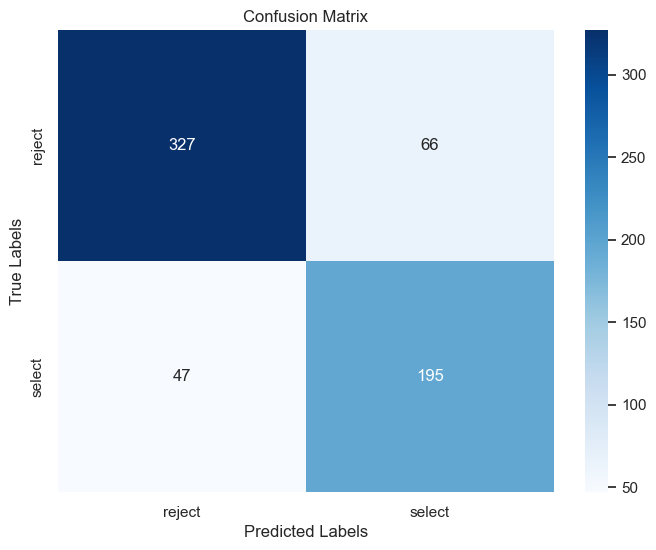

C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\tree\_export.py:673: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  ann.update_bbox_position_size(renderer)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


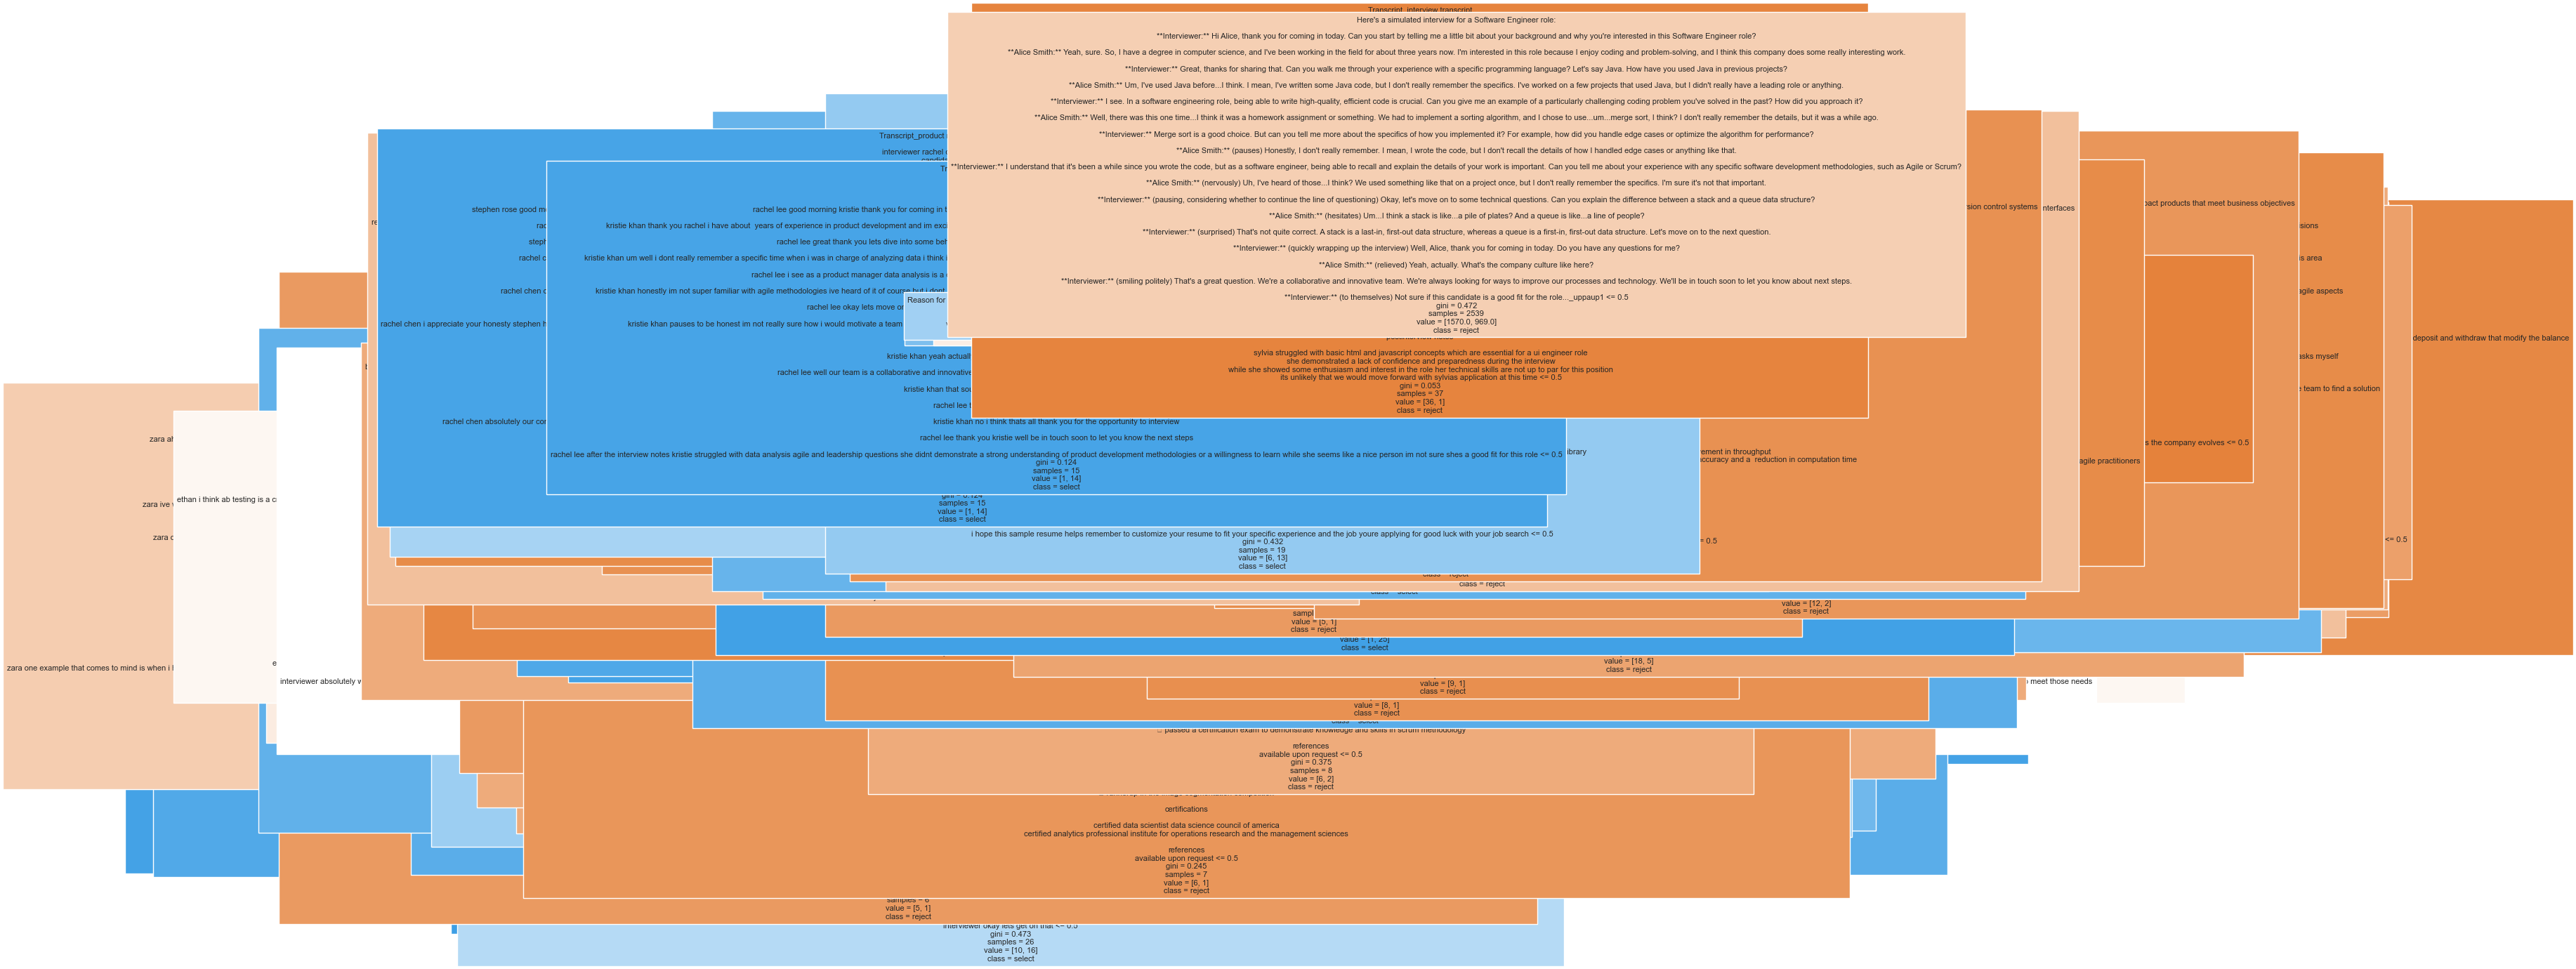

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Visualize the decision tree
def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(20, 10))
    plot_tree(model, filled=True, feature_names=feature_names, class_names=label_encoder.classes_, fontsize=8)
    plt.title('Decision Tree Visualization')
    plt.show()

# Call the functions to plot
plot_confusion_matrix(y_test, y_pred)

# Since the preprocessor transforms data, we need to reconstruct the feature names
feature_names = numeric_cols + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols))
plot_decision_tree(dt_model, feature_names)


# Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # n_estimators is the number of trees in the forest
rf_model.fit(X_train, y_train)

# Make predictions with the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRandom Forest Accuracy Score:")
print(accuracy_score(y_test, y_pred_rf))



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       393
           1       0.87      0.65      0.75       242

    accuracy                           0.83       635
   macro avg       0.84      0.80      0.81       635
weighted avg       0.83      0.83      0.82       635


Random Forest Confusion Matrix:
[[369  24]
 [ 84 158]]

Random Forest Accuracy Score:
0.8299212598425196


#  SVM

SVM Accuracy: 0.8346
SVM ROC AUC: 0.9213

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       393
           1       0.79      0.77      0.78       242

    accuracy                           0.83       635
   macro avg       0.83      0.82      0.82       635
weighted avg       0.83      0.83      0.83       635



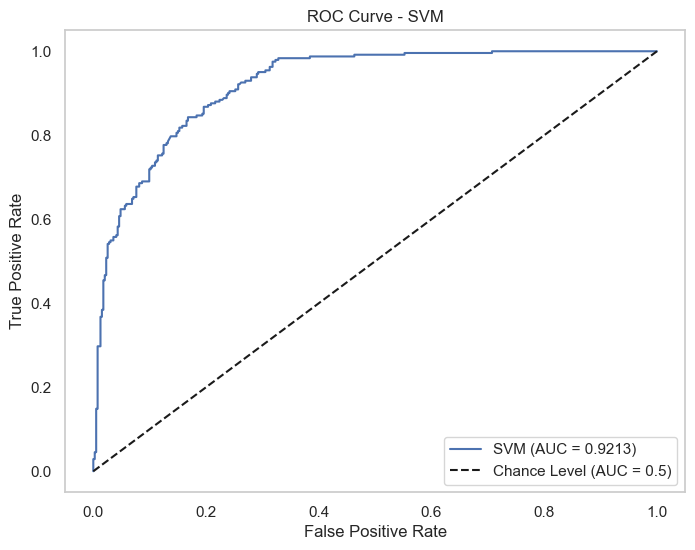

In [76]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report

import matplotlib.pyplot as plt

# Train an SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_prob_svm)

# Print results
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"SVM ROC AUC: {roc_auc_svm:.4f}\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc_svm:.4f})")
plt.plot([0, 1], [0, 1], "k--", label="Chance Level (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend(loc="lower right")
plt.grid()
plt.show()


#SVM 

In [77]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define transformers for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing numeric values with the mean
    ('scaler', StandardScaler())                 # Standardize numeric values
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode categorical values
])

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Define and train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nSVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nSVM Accuracy Score:")
print(accuracy_score(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       393
           1       0.79      0.77      0.78       242

    accuracy                           0.83       635
   macro avg       0.83      0.82      0.82       635
weighted avg       0.83      0.83      0.83       635


SVM Confusion Matrix:
[[344  49]
 [ 56 186]]

SVM Accuracy Score:
0.8346456692913385


# Random Forest

Random Forest Accuracy: 0.8299
Random Forest ROC AUC: 0.9324


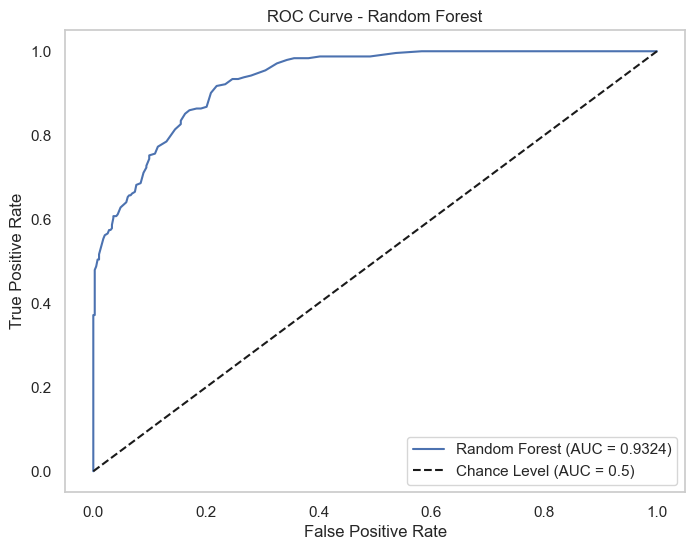

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Print results
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest ROC AUC: {roc_auc_rf:.4f}")

# Plot ROC Curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_rf:.4f})")
plt.plot([0, 1], [0, 1], "k--", label="Chance Level (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# KNN

KNN Accuracy: 0.7213
KNN ROC AUC: 0.7908

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       393
           1       0.63      0.64      0.64       242

    accuracy                           0.72       635
   macro avg       0.70      0.71      0.71       635
weighted avg       0.72      0.72      0.72       635



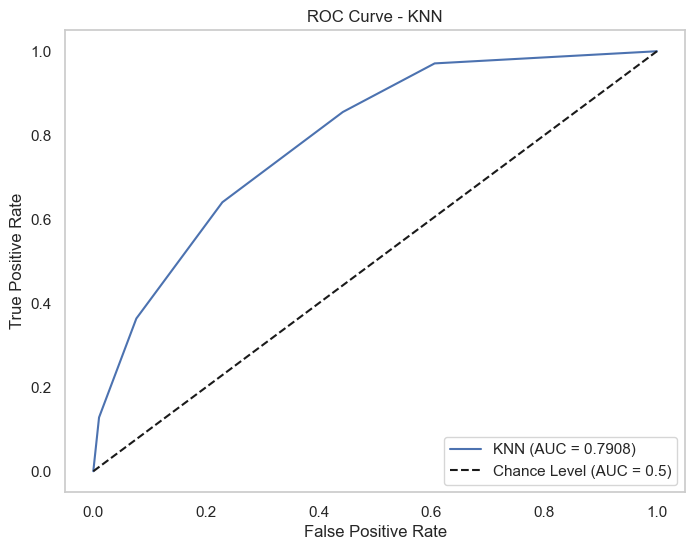

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn)

# Print results
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"KNN ROC AUC: {roc_auc_knn:.4f}\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"KNN (AUC = {roc_auc_knn:.4f})")
plt.plot([0, 1], [0, 1], "k--", label="Chance Level (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
plt.grid()
plt.show()



# Naive Bayes

Naive Bayes Accuracy: 0.7921
Naive Bayes ROC AUC: 0.8233


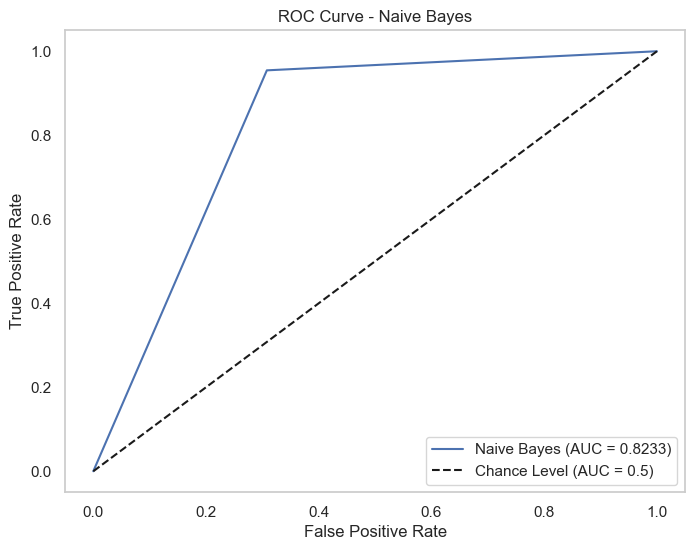

In [80]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Convert sparse data to dense format
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Train a Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_dense, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test_dense)
y_pred_prob_nb = nb_model.predict_proba(X_test_dense)[:, 1]  # Probabilities for ROC AUC

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_prob_nb)

# Print results
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")
print(f"Naive Bayes ROC AUC: {roc_auc_nb:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_nb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Naive Bayes (AUC = {roc_auc_nb:.4f})")
plt.plot([0, 1], [0, 1], "k--", label="Chance Level (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Gradient Boost

Gradient Boosting Accuracy: 0.8079
Gradient Boosting ROC AUC: 0.9302

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       393
           1       0.95      0.52      0.67       242

    accuracy                           0.81       635
   macro avg       0.86      0.75      0.77       635
weighted avg       0.84      0.81      0.79       635



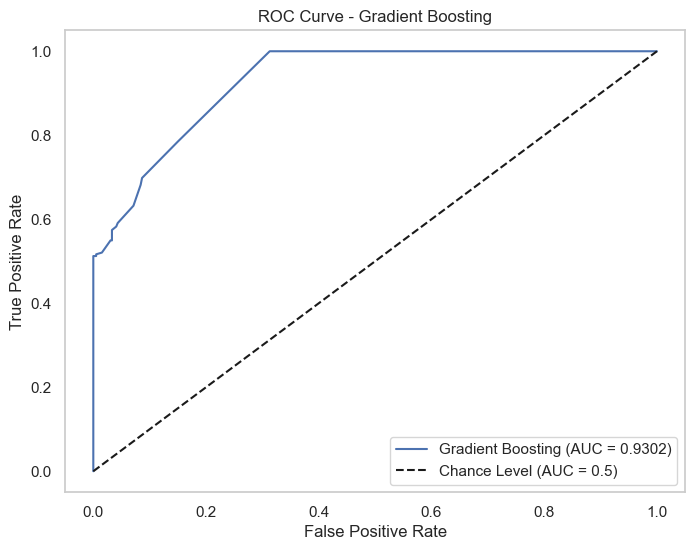

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Train a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)
y_pred_prob_gb = gb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_prob_gb)

# Print results
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")
print(f"Gradient Boosting ROC AUC: {roc_auc_gb:.4f}\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_gb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {roc_auc_gb:.4f})")
plt.plot([0, 1], [0, 1], "k--", label="Chance Level (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend(loc="lower right")
plt.grid()
plt.show()
